In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('orders.csv')

In [3]:
df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0
...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7


In [4]:
df.columns

Index(['order_id', 'user_id', 'order_timestamp', 'city', 'cuisine',
       'paid_cash', 'amount'],
      dtype='object')

In [5]:
df.isna().sum()

order_id           0
user_id            0
order_timestamp    0
city               0
cuisine            0
paid_cash          0
amount             0
dtype: int64

In [6]:
df.dtypes

order_id             int64
user_id              int64
order_timestamp     object
city                object
cuisine             object
paid_cash             bool
amount             float64
dtype: object

In [7]:
# Calculate frequency
frequency = df.groupby('user_id')['order_id'].count().reset_index()
frequency.columns = ['user_id', 'frequency']

# Calculate order value
order_value = df.groupby('user_id')['amount'].mean().reset_index()
order_value.columns = ['user_id', 'order_value']


In [8]:
df = df.merge(frequency, on='user_id')

In [9]:
df = df.merge(order_value, on='user_id')

In [10]:
df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,frequency,order_value
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.60,11,9.418182
1,7298530123540,94223136441,2022-01-15 11:05:04 UTC,Αίγιο,Breakfast,True,6.70,11,9.418182
2,7264394469484,94223136441,2022-01-10 11:54:47 UTC,Αίγιο,Breakfast,True,5.70,11,9.418182
3,7306501512700,94223136441,2022-01-16 12:09:59 UTC,Αίγιο,Breakfast,True,6.20,11,9.418182
4,7368818968312,94223136441,2022-01-26 11:20:12 UTC,Αίγιο,Breakfast,True,5.70,11,9.418182
...,...,...,...,...,...,...,...,...,...
534265,7360460735324,551306802291,2022-01-23 20:27:15 UTC,Αλεξανδρούπολη,Street food,True,10.35,1,10.350000
534266,7254089665388,74723220264,2022-01-08 21:17:19 UTC,Αλεξανδρούπολη,Street food,True,25.10,1,25.100000
534267,7315347998008,67756053414,2022-01-17 15:19:51 UTC,Αλεξανδρούπολη,Street food,True,17.80,1,17.800000
534268,7258947193332,181885879896,2022-01-09 16:09:21 UTC,Αλεξανδρούπολη,Street food,True,18.40,1,18.400000


In [11]:
# Define custom thresholds for frequency and order value
frequency_thresholds = [0, 10, 30, float('inf')]
order_value_thresholds = [0, 5, 20, float('inf')]

# Assign segments based on the thresholds
segment_labels = ['Low', 'Medium', 'High']
df['frequency_segment'] = pd.cut(df['frequency'], bins=frequency_thresholds, labels=segment_labels)
df['order_value_segment'] = pd.cut(df['order_value'], bins=order_value_thresholds, labels=segment_labels)

In [12]:
df['frequency_segment'].value_counts()

Low       331622
Medium    169632
High       33016
Name: frequency_segment, dtype: int64

In [13]:
df['order_value_segment'].value_counts()

Medium    423591
Low        97200
High       13479
Name: order_value_segment, dtype: int64

In [14]:
#Identify the target group for the "Breakfast" cuisine campaign
breakfast_customers = df[df['cuisine'] == 'Breakfast']
segment_counts = breakfast_customers['frequency_segment'].value_counts()

## Visualizations

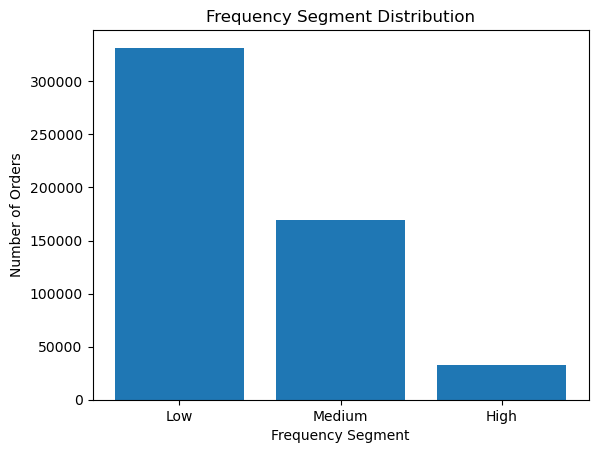

In [15]:
segment_counts = df['frequency_segment'].value_counts()

# Create a bar plot to visualize the segment distribution for frequency
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Frequency Segment')
plt.ylabel('Number of Orders')
plt.title('Frequency Segment Distribution')
plt.show()

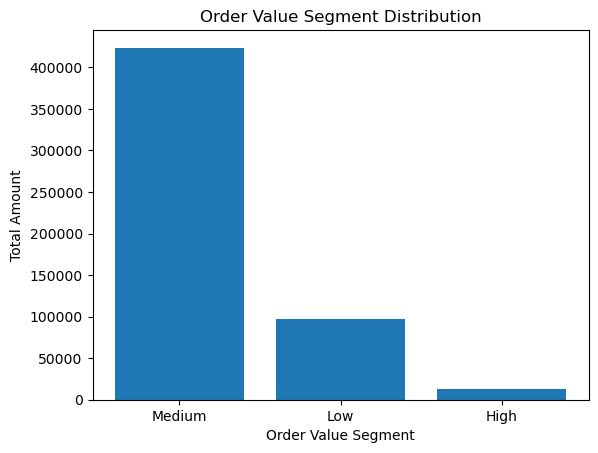

In [16]:
order_value_counts = df['order_value_segment'].value_counts()

# Create a bar plot to visualize the segment distribution for order value
plt.bar(order_value_counts.index, order_value_counts.values)
plt.xlabel('Order Value Segment')
plt.ylabel('Total Amount')
plt.title('Order Value Segment Distribution')
plt.show()

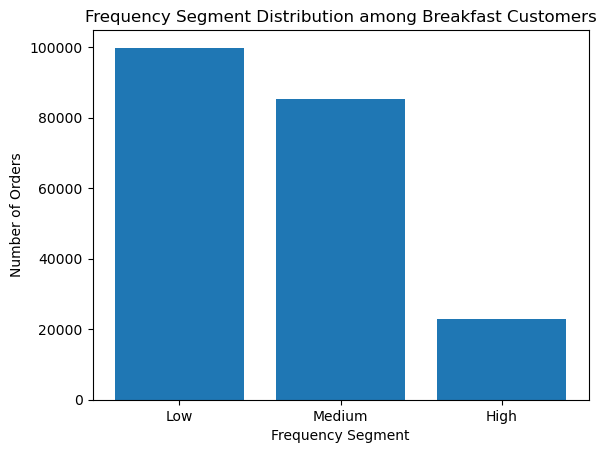

In [17]:
breakfast_segment_counts = breakfast_customers['frequency_segment'].value_counts()

# Create a bar plot to visualize the segment distribution for frequency among breakfast customers
plt.bar(breakfast_segment_counts.index, breakfast_segment_counts.values)
plt.xlabel('Frequency Segment')
plt.ylabel('Number of Orders')
plt.title('Frequency Segment Distribution among Breakfast Customers')
plt.show()

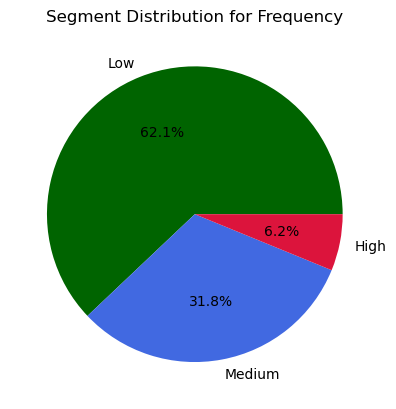

In [18]:
segment_counts = df['frequency_segment'].value_counts()

# Create a pie chart to visualize the segment distribution for frequency 
colors1 = [ '#006400','#4169E1','#DC143C']
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', colors=colors1)
plt.title('Segment Distribution for Frequency')
fig = plt.gcf()
fig.set_facecolor('none')  # Set the figure background color to transparent
plt.show()

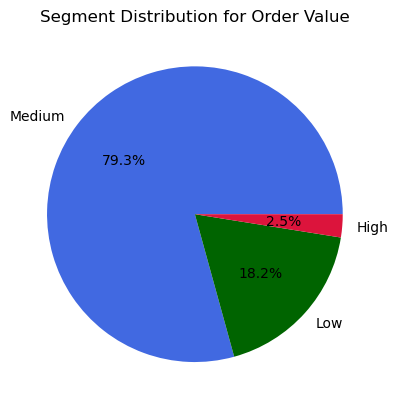

In [19]:
segment_counts = df['order_value_segment'].value_counts()

# Create a pie chart to visualize the segment distribution for order value 
colors2 = ['#4169E1','#006400' , '#DC143C']
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', colors=colors2)
plt.title('Segment Distribution for Order Value')
fig = plt.gcf()
fig.set_facecolor('none')  # Set the figure background color to transparent
plt.show()


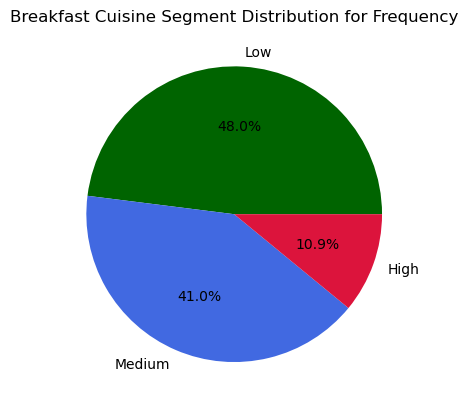

In [20]:
breakfast_segment_counts = breakfast_customers['frequency_segment'].value_counts()

# Create a pie chart to visualize the breakfast cuisine segment distribution for frequency 
colors3 = ['#006400','#4169E1', '#DC143C']
plt.pie(breakfast_segment_counts, labels=breakfast_segment_counts.index, autopct='%1.1f%%', colors=colors3)
plt.title('Breakfast Cuisine Segment Distribution for Frequency')
fig = plt.gcf()
fig.set_facecolor('none')  # Set the figure background color to transparent
plt.show()

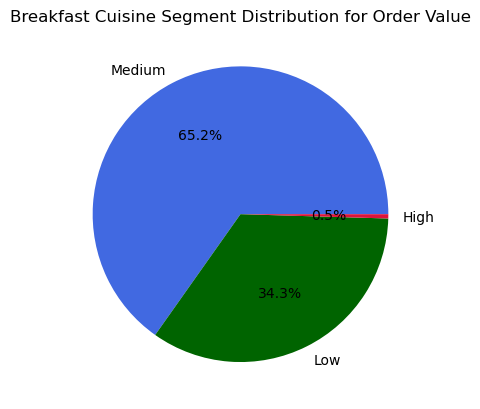

In [21]:
breakfast_segment_counts = breakfast_customers['order_value_segment'].value_counts()

# Create a pie chart to visualize the breakfast cuisine segment distribution for order value 
colors4= ['#4169E1', '#006400','#DC143C' ]
plt.pie(breakfast_segment_counts, labels=breakfast_segment_counts.index, autopct='%1.1f%%', colors=colors4)
plt.title('Breakfast Cuisine Segment Distribution for Order Value')
fig = plt.gcf()
fig.set_facecolor('none')  # Set the figure background color to transparent
plt.show()

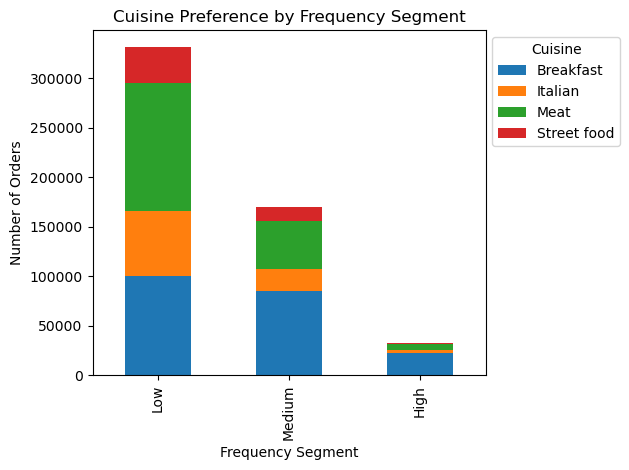

In [22]:
cuisine_parent_counts = df.groupby(['frequency_segment', 'cuisine'])['order_id'].count().unstack()

#Create a bar plot showing Cuisine Preference by Frequency Segment
ax = cuisine_parent_counts.plot(kind='bar', stacked=True)
plt.xlabel('Frequency Segment')
plt.ylabel('Number of Orders')
plt.title('Cuisine Preference by Frequency Segment')
plt.legend(title='Cuisine', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()

fig = plt.gcf()
fig.set_facecolor('none')  # Set the figure background color to transparent

plt.show()


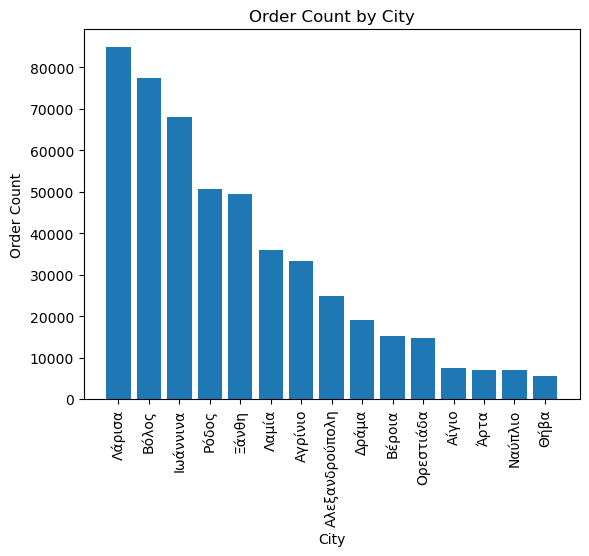

In [23]:
city_order_counts = df['city'].value_counts()

# Select the top 15 cities
top_15_cities = city_order_counts.head(15)

# Create a bar plot to visualize the order count by city (Top 15 cities)
plt.bar(top_15_cities.index, top_15_cities.values)
plt.xlabel('City')
plt.ylabel('Order Count')
plt.title('Order Count by City')
plt.xticks(rotation=90)
plt.show()


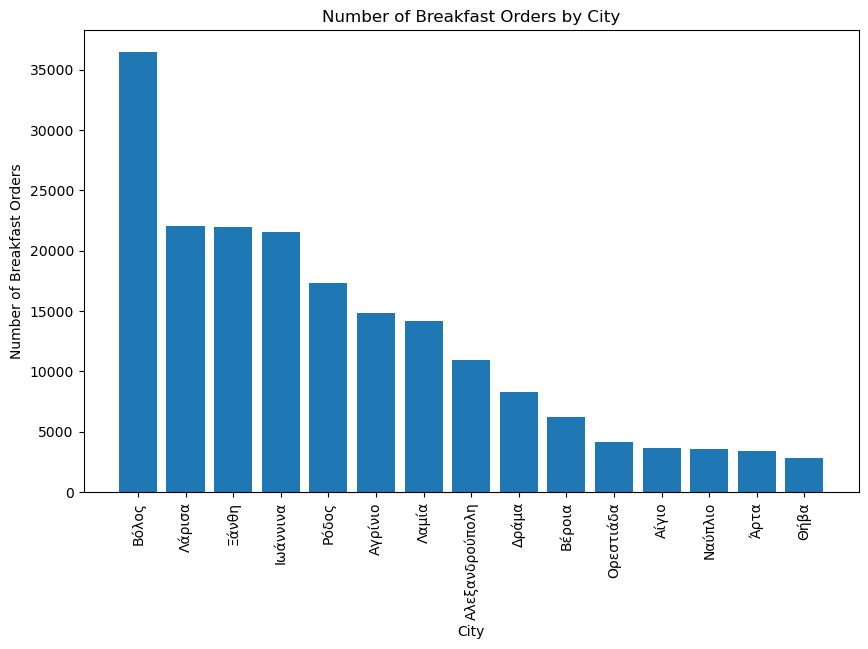

In [24]:
breakfast_orders = df[df['cuisine'] == 'Breakfast']

# Calculate the breakfast order count by city
breakfast_city_order_counts = breakfast_orders['city'].value_counts()

# Select the top 15 cities
top_15_cities = breakfast_city_order_counts.head(15)

# Create a bar plot to visualize the breakfast order count by city (Top 15 cities)
plt.figure(figsize=(10, 6))
plt.bar(top_15_cities.index, top_15_cities.values)
plt.xlabel('City')
plt.ylabel('Number of Breakfast Orders')
plt.title('Number of Breakfast Orders by City')
plt.xticks(rotation=90)

fig = plt.gcf()
fig.set_facecolor('none')  # Set the figure background color to transparent
plt.show()


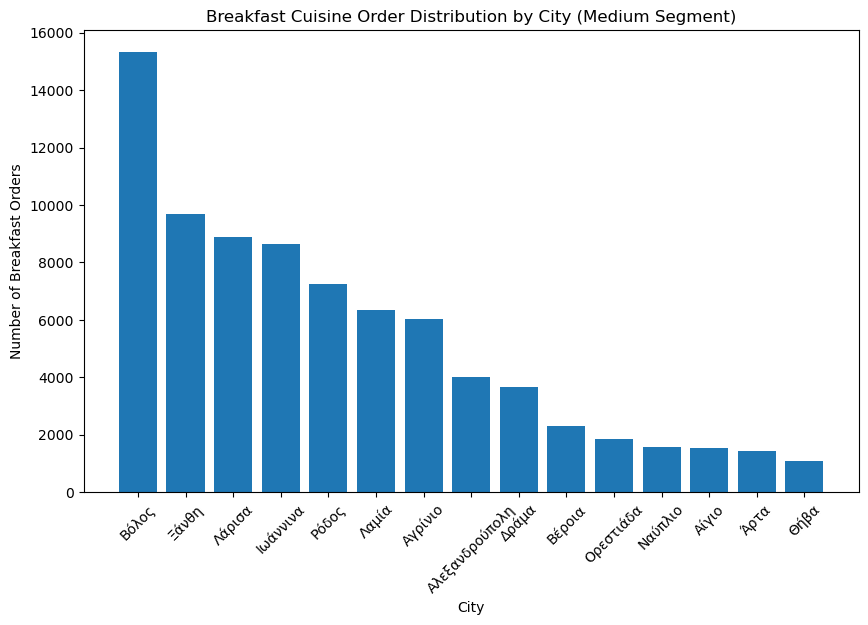

In [25]:
medium_frequency_cities = breakfast_customers[breakfast_customers['frequency_segment'] == 'Medium']['city'].value_counts()

# Select the top 15 cities
top_15_cities = medium_frequency_cities.head(15)

plt.figure(figsize=(10, 6))
plt.bar(top_15_cities.index, top_15_cities.values)
plt.xlabel('City')
plt.ylabel('Number of Breakfast Orders')
plt.title('Breakfast Cuisine Order Distribution by City (Medium Segment)')
plt.xticks(rotation=45)
fig = plt.gcf()
fig.set_facecolor('none')  # Set the figure background color to transparent
plt.show()


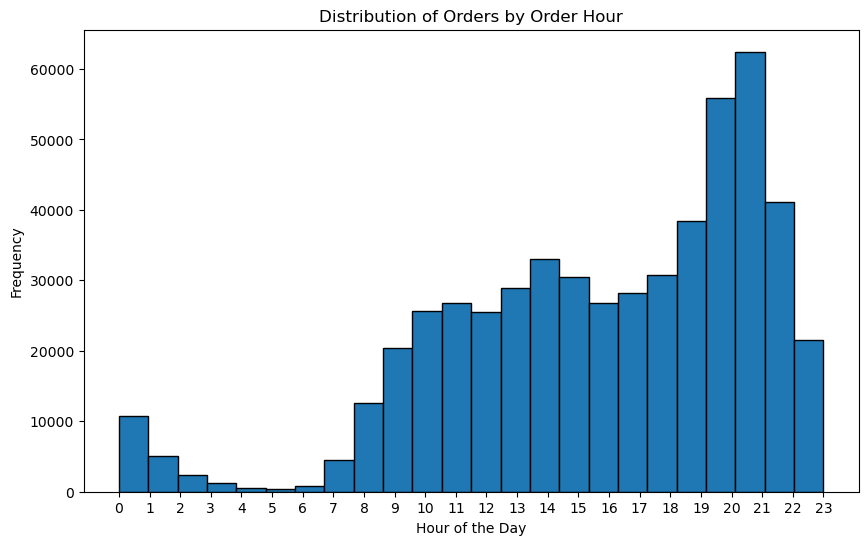

In [26]:
# Extract the hour from the order timestamp
df['order_hour'] = pd.to_datetime(df['order_timestamp']).dt.hour

# Create a histogram of breakfast orders by order hour
plt.figure(figsize=(10, 6))
plt.hist(df['order_hour'], bins=24, edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Orders by Order Hour')
plt.xticks(range(24))
plt.show()

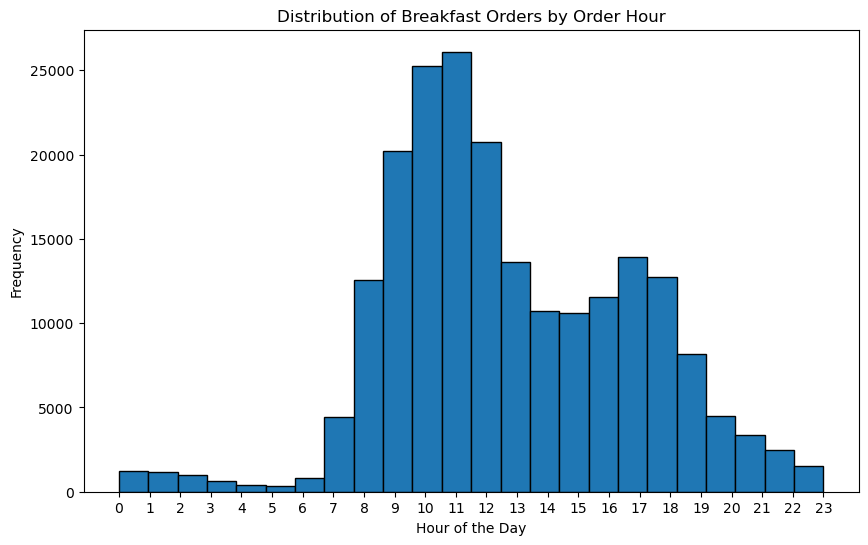

In [27]:
# Extract the hour from the order timestamp
breakfast_orders['order_hour'] = pd.to_datetime(breakfast_orders['order_timestamp']).dt.hour

# Create a histogram of breakfast orders by order hour
plt.figure(figsize=(10, 6))
plt.hist(breakfast_orders['order_hour'], bins=24, edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Breakfast Orders by Order Hour')
plt.xticks(range(24))
fig = plt.gcf()
fig.set_facecolor('none')  # Set the figure background color to transparent
plt.show()


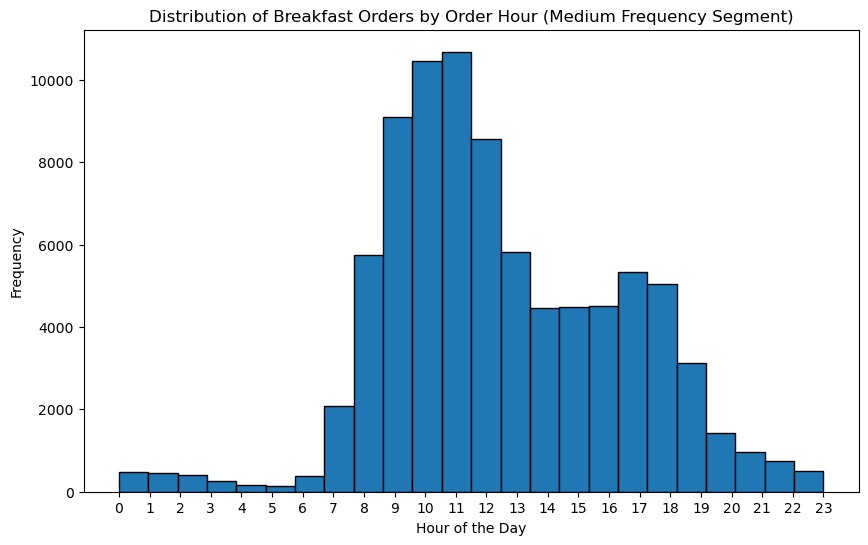

In [28]:
# Filter the DataFrame for breakfast orders in the medium frequency segment
medium_frequency_orders = df[df['frequency_segment'] == 'Medium']

# Filter further for breakfast cuisine
medium_frequency_breakfast_orders = medium_frequency_orders[medium_frequency_orders['cuisine'] == 'Breakfast']

# Extract the hour from the order timestamp
medium_frequency_breakfast_orders['order_hour'] = pd.to_datetime(medium_frequency_breakfast_orders['order_timestamp']).dt.hour

# Create a histogram of breakfast orders by order hour for the very high frequency segment
plt.figure(figsize=(10, 6))
plt.hist(medium_frequency_breakfast_orders['order_hour'], bins=24, edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Breakfast Orders by Order Hour (Medium Frequency Segment)')
plt.xticks(range(24))
fig = plt.gcf()
fig.set_facecolor('none')  # Set the figure background color to transparent
plt.show()
